<a href="https://colab.research.google.com/github/romaniuk-o/Python_Data_Science_HW5/blob/main/HW_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У другій частині попереднього домашнього завдання ми вирішували диференціальні рівняння та будували графіки. Продовжуємо працювати над цією домашньою роботою далі.


In [59]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, leastsq, minimize_scalar

import numpy as np

In [60]:
α = 0.5
𝛽 = 0.3
N0 = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

#--------------------------------------------------------------------------

def dSdt(t, S):
    return - α * S

soln_1 = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)

t_1, s_1 = soln_1.t, soln_1.y[0]
z_1, = soln_1.sol(t_1)

#--------------------------------------------------------------------------


def dSdt(t, I):
    return α * soln_1.sol(t) - 𝛽 * I


soln_2 = solve_ivp(dSdt, (t0, tf), [I0], dense_output=True)

t_2, s_2 = soln_2.t, soln_2.y[0]
z_2, = soln_2.sol(t_2)

#--------------------------------------------------------------------------

S_t = interp1d(t_1, s_1, kind='cubic')
I_t = interp1d(t_2, s_2, kind='cubic')
R = N0 - S_t(t_1) - I_t(t_1)



**HW5---------------HW5---------------HW5---------------------HW5---------------HW5---------------------HW5**


Необхідно методом найменших квадратів:


1. для набору даних графіка функції $S(t)$ отримати рівняння виду 
$S(t)=S0*e^−αt

In [61]:

def fun_1(t, s, α):
    return s * np.exp(-α * t)

def diff_1(p, y, t):
    s, α = p
    return y - fun_1(t, s, α)


p0 = S0, α 
apr_s, _ = leastsq(diff_1, p0, args=(s_1, t_1))
apr_s

array([9.89978640e+05, 4.99856001e-01])

2. для набору даних графіка функції $I(t)$ отримати рівняння виду $I(t)=(I0+αS0t)e^−αt

In [62]:

def fun_2(t, s, α, i):
    return (i + α * s * t) * np.exp(-α * t)

def diff_2(p, y, t):
    s, α, i = p
    return y - fun_2(t, s, α, i)


p0 = S0, α, I0
apr_i, _ = leastsq(diff_2, p0, args=(s_2, t_2))
apr_i

array([1.25281252e+06, 3.83762944e-01, 8.08519969e+03])

3. Для рівняння $R(t)$ графік функції буде $R(t)=N−S(t)−I(t)$:

In [63]:
def fun_3(t_1, t_2):
  return N0 - fun_1(t_2, *apr_s) - fun_2(t_2, *apr_i)

fun_3(t_1, t_2)


# R = N0 - fun_1(t_1, *apr_s) - fun_2(t_2, *apr_i)
# R

array([  1936.16065529,   2192.06072371,   6032.90274288, 118003.92225701,
       360955.56068284, 614359.24923669, 820454.71497198, 928669.85103112,
       973164.16446555, 990122.40164729, 996360.72180881, 998670.12068635,
       999176.83703915])

4. Побудувати всі три графіки $S(t), I(t)$ і $R(t)$ на одній області відображення, отримані методом найменших квадратів

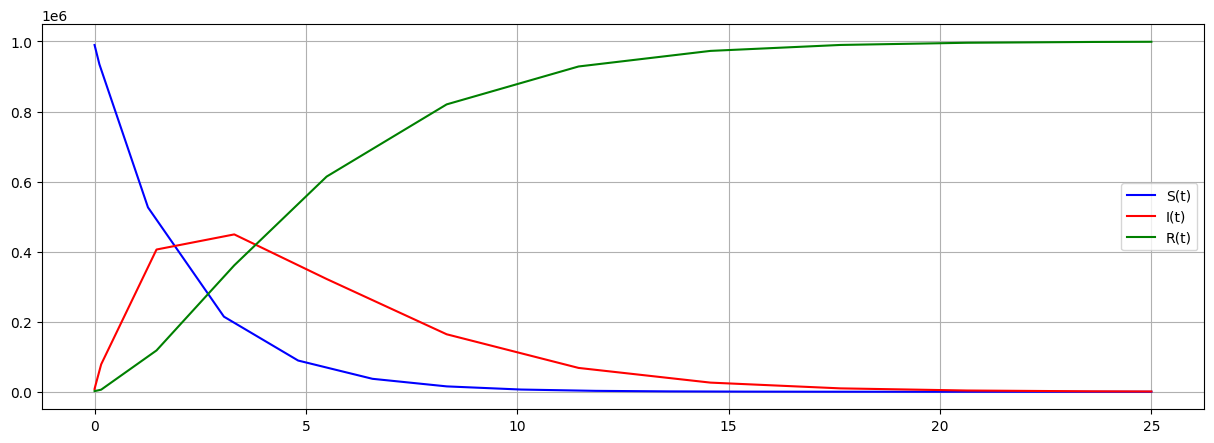

In [64]:
plt.subplots(figsize=(15, 5))

plt.plot(t_1, fun_1(t_1, apr_s[0], apr_s[1]), 'b', label='S(t)')

plt.plot(t_2, fun_2(t_2, apr_i[0], apr_i[1], apr_i[2]), 'r', label='I(t)')

plt.plot(t_2, fun_3(t_1, t_2),'g', label='R(t)')


plt.legend()
plt.grid()
plt.show()

5. Знайти час $tmax$, за якого кількість інфекційних індивідів максимальна. Потрібно за допомогою методу ***minimize_scalar*** знайти, коли функція $I(t)$ досягає свого максимуму.

In [65]:

t_max = minimize_scalar(lambda t_2 : -fun_2(t_2, S0, α, I0), bounds=(0, 5))
t_max.x

1.9858586318719673